In [1]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/drive/MyDrive/AI/FBProphet/airline_passengers.csv')

In [3]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


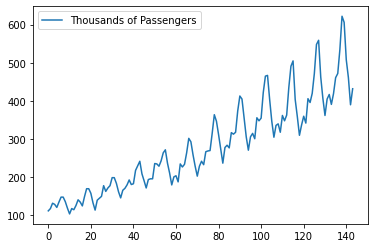

In [5]:
df.plot()

In [6]:
df.columns = ['ds', 'y']

In [7]:
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [8]:
df.drop(144,axis=0,inplace=True)

In [9]:
df.tail()

,ds,y
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [10]:
df['ds'] = pd.to_datetime(df['ds'])

In [11]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [12]:
from fbprophet import Prophet

In [13]:
print(Prophet)

<class 'fbprophet.forecaster.Prophet'>


In [14]:
model = Prophet()

In [15]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [17]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [18]:
future_dates = model.make_future_dataframe(periods=365)

In [19]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [20]:
predictions = model.predict(future_dates)

In [21]:
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.727984,55.387333,113.064980,106.727984,106.727984,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,0.0,0.0,0.0,84.807353
1,1949-02-01,108.901201,50.310578,108.024806,108.901201,108.901201,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,0.0,0.0,0.0,78.218354
2,1949-03-01,110.864107,83.934325,138.418722,110.864107,110.864107,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,0.0,0.0,0.0,110.361397
3,1949-04-01,113.037323,79.652308,137.417622,113.037323,113.037323,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,0.0,0.0,0.0,107.851823
4,1949-05-01,115.140437,80.717937,141.139250,115.140437,115.140437,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,0.0,0.0,0.0,111.351735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1961-11-27,520.639276,470.575188,527.891586,520.116638,521.262181,-22.354203,-22.354203,-22.354203,-22.354203,-22.354203,-22.354203,0.0,0.0,0.0,498.285073
505,1961-11-28,520.739726,468.266041,523.322821,520.213882,521.365629,-23.984202,-23.984202,-23.984202,-23.984202,-23.984202,-23.984202,0.0,0.0,0.0,496.755524
506,1961-11-29,520.840176,465.227419,522.211738,520.311127,521.470128,-26.252105,-26.252105,-26.252105,-26.252105,-26.252105,-26.252105,0.0,0.0,0.0,494.588071
507,1961-11-30,520.940625,461.133631,520.726495,520.408372,521.574511,-29.113730,-29.113730,-29.113730,-29.113730,-29.113730,-29.113730,0.0,0.0,0.0,491.826895


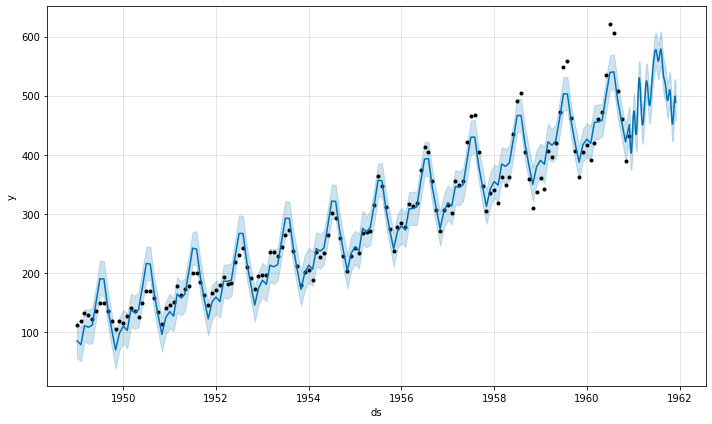

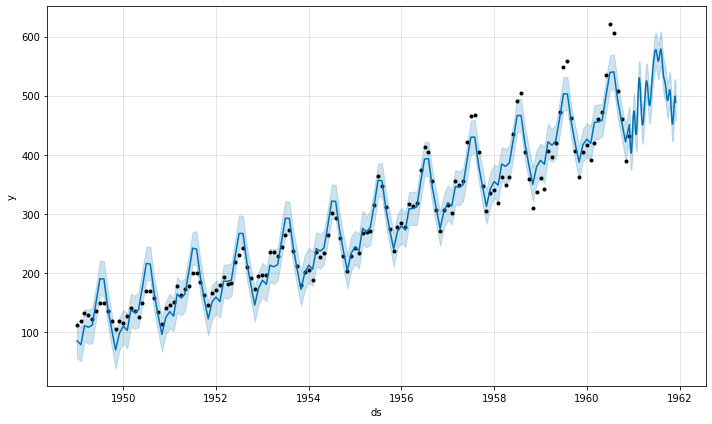

In [22]:
model.plot(predictions)

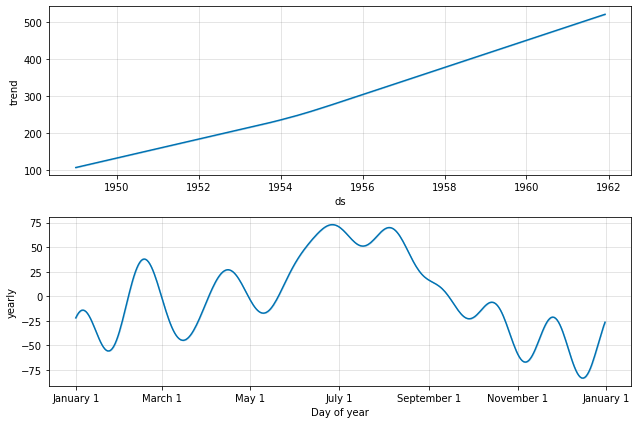

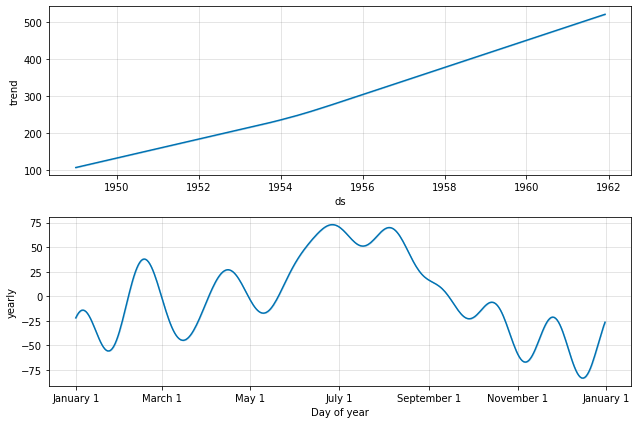

In [23]:
model.plot_components(predictions)

In [24]:
from fbprophet.diagnostics import cross_validation

In [25]:
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days' )

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [26]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,158.013969,157.805278,158.201895,150.0,1951-01-18
1,1951-03-01,171.224502,170.528071,171.868090,178.0,1951-01-18
2,1951-04-01,159.628157,158.236571,160.959946,163.0,1951-01-18
3,1951-05-01,145.666500,143.659887,147.832678,172.0,1951-01-18
4,1951-06-01,180.679910,177.567626,183.861621,178.0,1951-01-18


In [27]:
from fbprophet.diagnostics import  performance_metrics

In [28]:
pm = performance_metrics(df_cv)

In [30]:
pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1083.476338,32.916202,25.895616,0.078758,0.073725,0.227273
1,42 days,1009.201759,31.767936,25.246674,0.077080,0.073725,0.181818
2,46 days,906.510734,30.108317,24.749820,0.079413,0.084057,0.136364
3,47 days,1039.076713,32.234713,26.867165,0.082299,0.085796,0.136364
4,48 days,1027.847500,32.060061,26.277771,0.080195,0.085796,0.181818
...,...,...,...,...,...,...,...
165,359 days,767.192965,27.698248,21.737830,0.069323,0.061258,0.250000
166,360 days,770.736150,27.762135,22.023183,0.070200,0.061258,0.227273
167,362 days,860.697354,29.337644,23.247995,0.069206,0.061258,0.227273
168,364 days,834.406224,28.886091,22.181478,0.066297,0.051361,0.272727


In [31]:
from fbprophet.plot import plot_cross_validation_metric

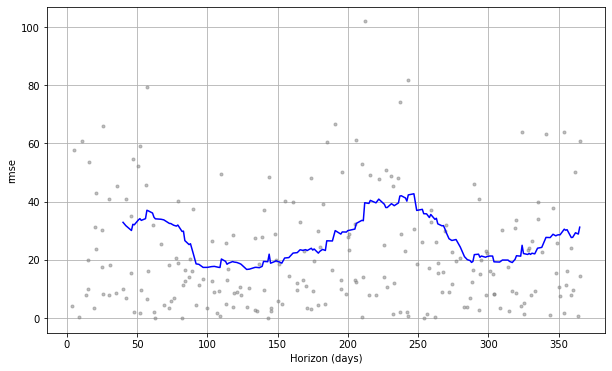

In [32]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')